# MIDTERM PROJECT

#### Ben Kavouras

In [1251]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from tabulate import tabulate as tb

## Givens

In [1252]:
# Aircraft

Airspeed = 200 # ktas
Altitude = 10000 # ft

Q = 0.5*0.000800878*((Airspeed*1.6878099)**2) # slug/ft^2

Weight = 4000 # lbs

Ix = 2500 # slug ft^2
Iy = 20500 # slug ft^2
Iz = 25000 # slug ft^2
Ixy = 0 # slug ft^2

# Main Wing

ClBw = 0
b_wing = 35 # ft
MAC_wing = 6.5 # ft
SA_wing = 227 # ft^2
AR_wing = (b_wing**2)/SA_wing

# Main Wing & Fuselage

CnB_wf = -0.10
Cnr_wf = -0.02

# Tail

Cla_T = 5.9

## Assumptions

In [1253]:
# Distance of tail aerodynamic center to aircraft cg
loc = 12 # ft

# Vertical tail height
b_T = 15 # ft

# % rudder
rudder = 0.4 # therefore;
tau = 0.6

# Vertical tail aspect ratio
ART = 1.6

# Vertical tail efficiency factor
eta = 1

In [1254]:
# From Assumptions

CLa_T = Cla_T/(1+(Cla_T/(np.pi*ART)))

print("3D lift curve slope = %3.2f \n" % CLa_T)

SA_T = (b_T**2)/ART

print("Tail Area = %3.2f ft^2 \n" % SA_T)

V_T = (loc*SA_T)/(SA_wing*b_wing)

print("Tail Volume Ratio = %3.2f \n" % V_T)

Dsidewash = ((0.724+(3.06*((SA_T/SA_wing)/(1+np.cos(0))))+0.009*AR_wing)*(1/eta))-1

print("Change in sidewash angle with a change in sideslip angle = %3.2f \n" % Dsidewash)

Sidewash = 15*(1/Dsidewash)

print("Rudder deflection at a 15-degree sideslip = %3.2f degrees" % Sidewash)

print("Maximum rudder deflection = %3.2f degrees" % (35*0.75))

if Sidewash > (35*0.75):
    print("Fail")
else:
    print("Pass")

3D lift curve slope = 2.71 

Tail Area = 140.62 ft^2 

Tail Volume Ratio = 0.21 

Change in sidewash angle with a change in sideslip angle = 0.72 

Rudder deflection at a 15-degree sideslip = 20.82 degrees
Maximum rudder deflection = 26.25 degrees
Pass


### Find

| Parameter | Value | Unit |
| - | - | - |
| $ (C_{n_{\beta}})_{VT} $ | | |
| $ C_{n_{\beta}} $ | |
| $ (C_{n_r})_{VT} $ | | |
| $ C_{n_r} $ | | |
| $ C_{n_{\delta r}} $ | | |
| $ N_{\beta} $ | | |
| $ N_r $ | | |
| $ N_{\delta_r} $ | | |
| $ \zeta $ | | |
| $ \omega $ | | |


In [1255]:
C_np = -1*(CLa_T/8)

In [1256]:
C_nB_VT = eta*V_T*CLa_T*(1+Dsidewash)

C_nB = CnB_wf + C_nB_VT

C_nr_VT = -2*eta*V_T*(loc/b_T)*CLa_T

C_nr = Cnr_wf + C_nr_VT

C_ndr = V_T*eta*tau*CLa_T

In [1257]:
N_B = (Q*SA_wing*b_wing*C_nB)/Iz

N_r = (Q*SA_wing*(b_wing**2)*C_nr)/(2*Ix*(Airspeed*1.6878099))

N_dr = (Q*SA_wing*b_wing*C_ndr)/Iz

In [1258]:
frequency = np.sqrt(N_B)

damping = -1*(N_r/(2*frequency))

In [1259]:
ans = np.array([["Parameter","Value","Unit"],["(C_nB)_VT",C_nB_VT," "],["C_nB",C_nB," "],["(C_nr)_VT",C_nr_VT," "],["C_nr",C_nr," "],["C_ndr",C_ndr," "],["N_B",N_B,"slug-ft"],["N_r",N_r,"slug-ft"],["N_dr",N_dr,"slug-ft"],["Damping Ratio",damping," "],["Frequency",frequency,"rad/s"]])
print(tb(ans,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════╤═══════════╤═════════╕
│ Parameter     │     Value │ Unit    │
╞═══════════════╪═══════════╪═════════╡
│ (C_nB)_VT     │  0.991783 │         │
├───────────────┼───────────┼─────────┤
│ C_nB          │  0.891783 │         │
├───────────────┼───────────┼─────────┤
│ (C_nr)_VT     │ -0.922378 │         │
├───────────────┼───────────┼─────────┤
│ C_nr          │ -0.942378 │         │
├───────────────┼───────────┼─────────┤
│ C_ndr         │  0.345892 │         │
├───────────────┼───────────┼─────────┤
│ N_B           │ 12.9317   │ slug-ft │
├───────────────┼───────────┼─────────┤
│ N_r           │ -7.08446  │ slug-ft │
├───────────────┼───────────┼─────────┤
│ N_dr          │  5.01577  │ slug-ft │
├───────────────┼───────────┼─────────┤
│ Damping Ratio │  0.985028 │         │
├───────────────┼───────────┼─────────┤
│ Frequency     │  3.59607  │ rad/s   │
╘═══════════════╧═══════════╧═════════╛


## Tail Render

In [1260]:
# Deduced values

chord = SA_T/b_T

print("Mean Chord Length = %3.2f ft \n" % chord)


Mean Chord Length = 9.38 ft 



In [1261]:
# Airfoil

# NACA 0009 used

airfoil_x_unit = np.array([1.000000,0.995720,0.982960,0.961940,0.933010,0.896680,0.853550,0.804380,0.750000,
                           0.691340,0.629410,0.565260,0.500000,0.434740,0.370590,0.339280,0.308660,0.278860,
                           0.250000,0.222210,0.195620,0.170330,0.146450,0.124080,0.103320,0.084270,0.066990,
                           0.051560,0.038060,0.026530,0.017040,0.009610,0.004280,0.001070,0.000000,
                           0.001070,0.004280,0.009610,0.017040,0.026530,0.038060,0.051560,0.066990,0.084270,
                           0.103320,0.124080,0.146450,0.170330,0.195620,0.222210,0.250000,0.278860,0.308660,
                           0.339280,0.370590,0.434740,0.500000,0.565260,0.629410,0.691340,0.750000,0.804380,
                           0.853550,0.896680,0.933010,0.961940,0.982960,0.995720,1.000000])

airfoil_y_unit = np.array([0.000000,0.000570,0.002180,0.004630,0.007700,0.011270,0.015220,0.019450,0.023840,
                           0.028230,0.032470,0.036380,0.039780,0.042480,0.044310,0.044840,0.045090,0.045040,
                           0.044660,0.043970,0.042950,0.041610,0.039940,0.037950,0.035640,0.033050,0.030230,
                           0.027200,0.023950,0.020390,0.016460,0.012140,0.007670,0.003490,0.000000,-0.003490,
                           -0.007670,-0.012140,-0.016460,-0.020390,-0.023950,-0.027200,-0.030230,-0.033050,
                           -0.035640,-0.037950,-0.039940,-0.041610,-0.042950,-0.043970,-0.044660,-0.045040,
                           -0.045090,-0.044840,-0.044310,-0.042480,-0.039780,-0.036380,-0.032470,-0.028230,
                           -0.023840,-0.019450,-0.015220,-0.011270,-0.007700,-0.004630,-0.002180,-0.000570,
                           0.000000])

69
69


In [1262]:
# FOR NO CHORD SWEEP (RECTANGULAR TAIL)

airfoil_x_0 = airfoil_x_unit*chord
airfoil_y_0 = airfoil_y_unit*chord

LE = np.array([[0,0],[0,0],[0,b_T]])
TE = np.array([[chord,chord],[0,0],[0,b_T]])

rudderstart = chord*(1-rudder)

rudder_x_0 = np.array([])
rudder_y_0 = np.array([])

index = 0

for i in airfoil_x_0:
    if i > rudderstart:
        rudder_x_0 = np.append(rudder_x_0,i)
        rudder_y_0 = np.append(rudder_y_0,airfoil_y_0[index])

    index += 1

rudderedge1 = np.array([[np.min(rudder_x_0),np.min(rudder_x_0)],[np.min(rudder_y_0),np.min(rudder_y_0)],[0,b_T]])
rudderedge2 = np.array([[np.min(rudder_x_0),np.min(rudder_x_0)],[np.max(rudder_y_0),np.max(rudder_y_0)],[0,b_T]])

[ 0.          0.00534375  0.0204375   0.04340625  0.0721875   0.10565625
  0.1426875   0.18234375  0.2235      0.26465625  0.30440625 -0.30440625
 -0.26465625 -0.2235     -0.18234375 -0.1426875  -0.10565625 -0.0721875
 -0.04340625 -0.0204375  -0.00534375  0.        ]


In [1263]:
# FOR CHORD SWEEP

quarterchord = 35 # degrees

taperratio = 0.5

rootchord = chord + (taperratio/2)*chord
tipchord = chord - (taperratio/2)*chord

airfoil_x_r = airfoil_x_unit*rootchord
airfoil_y_r = airfoil_y_unit*rootchord

airfoil_x_t = airfoil_x_unit*tipchord
airfoil_y_t = airfoil_y_unit*tipchord

qrootchord = rootchord * 0.25
qtipchord = tipchord * 0.25

locdiff = b_T*np.tan(np.radians(quarterchord))

posdiff = qrootchord+locdiff-qtipchord

LEs = np.array([[0,qrootchord+(locdiff-qtipchord)],[0,0],[0,b_T]])
TEs = np.array([[rootchord,posdiff+(tipchord)],[0,0],[0,b_T]])

rudderstartr = rootchord*(1-rudder)

rudder_x_r = np.array([])
rudder_y_r = np.array([])

index = 0

for i in airfoil_x_r:
    if i > rudderstartr:
        rudder_x_r = np.append(rudder_x_r,i)
        rudder_y_r = np.append(rudder_y_r,airfoil_y_r[index])

    index += 1

rudderstartt = tipchord*(1-rudder)

rudder_x_t = np.array([])
rudder_y_t = np.array([])

index = 0

for i in airfoil_x_t:
    if i > rudderstartt:
        rudder_x_t = np.append(rudder_x_t,i)
        rudder_y_t = np.append(rudder_y_t,airfoil_y_t[index])
    
    index += 1

ruddersedge1 = np.array([[np.min(rudder_x_r),np.min(rudder_x_t)+posdiff],[np.min(rudder_y_r),np.min(rudder_y_t)],[0,b_T]])
ruddersedge2 = np.array([[np.min(rudder_x_r),np.min(rudder_x_t)+posdiff],[np.max(rudder_y_r),np.max(rudder_y_t)],[0,b_T]])

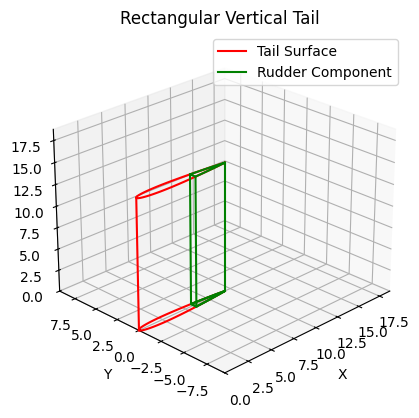

In [1264]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot3D(airfoil_x_0, airfoil_y_0, np.zeros(len(airfoil_x_0)), 'red')

ax.plot3D(rudder_x_0, rudder_y_0, np.zeros(len(rudder_x_0)), 'green')

ax.plot3D(airfoil_x_0, airfoil_y_0, np.zeros(len(airfoil_x_0))+b_T, 'red')
ax.plot3D(LE[0],LE[1],LE[2],'red')

ax.plot3D(rudder_x_0, rudder_y_0, np.zeros(len(rudder_x_0)), 'green')
ax.plot3D(rudder_x_0, rudder_y_0, np.zeros(len(rudder_x_0))+b_T, 'green')
ax.plot3D(TE[0],TE[1],TE[2],'green')
ax.plot3D(rudderedge1[0],rudderedge1[1],rudderedge1[2],'green')
ax.plot3D(rudderedge2[0],rudderedge2[1],rudderedge2[2],'green')

ax.set_title('Rectangular Vertical Tail')

ax.set_xlim(0,2*chord)
ax.set_ylim(-chord,chord)
ax.set_zlim(0,2*chord)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.legend(['Tail Surface','Rudder Component'])

ax.view_init(elev=25, azim=-135)

plt.show()

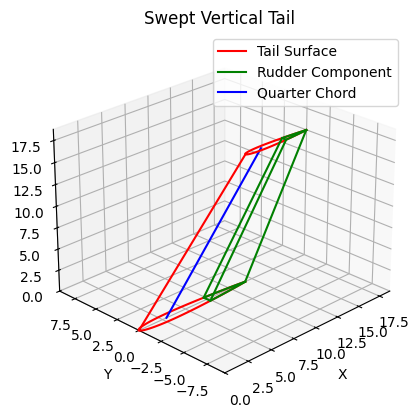

In [1265]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

ax2.plot3D(airfoil_x_r, airfoil_y_r, np.zeros(len(airfoil_x_r)), 'red')

ax2.plot3D(rudder_x_r, rudder_y_r, np.zeros(len(rudder_x_r)), 'green')

ax2.plot3D([qrootchord,posdiff+qtipchord],[0,0],[0,b_T],'blue')

ax2.plot3D(airfoil_x_t+posdiff, airfoil_y_t, np.zeros(len(airfoil_x_t))+b_T, 'red')

ax2.plot3D(LEs[0],LEs[1],LEs[2],'red')

ax2.plot3D(rudder_x_t+posdiff, rudder_y_t, np.zeros(len(rudder_x_t))+b_T, 'green')
ax2.plot3D(TEs[0],TEs[1],TEs[2],'green')
ax2.plot3D(ruddersedge1[0],ruddersedge1[1],ruddersedge1[2],'green')
ax2.plot3D(ruddersedge2[0],ruddersedge2[1],ruddersedge2[2],'green')

ax2.set_title('Swept Vertical Tail')

ax2.set_xlim(0,2*chord)
ax2.set_ylim(-chord,chord)
ax2.set_zlim(0,2*chord)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')

ax2.legend(['Tail Surface','Rudder Component','Quarter Chord'])

ax2.view_init(elev=25, azim=-135)

plt.show()